In [1]:
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
import math
from math import exp, pi
from ROOT import TFile, TTree
import uproot
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm

import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.mlab as mlab
from pylab import rcParams
#import seaborn as sns
#sns.set()


from root_numpy import root2array, tree2array,testdata
from root_pandas import read_root
from glob import glob
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
from scipy.misc import factorial

Welcome to JupyROOT 6.12/06


In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
NUSELECTION = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and neutrinotracks>1 and cosmic_trk_50==0'# and tracklength>20 and distance_nu_smallest>15'# '
NUSELECTION_rand='_rand_vtx_x>50.0 and _rand_vtx_x<206.35 and _rand_vtx_y>-66.5 and _rand_vtx_y<66.5 and _rand_vtx_z>50.0 and _rand_vtx_z<886.8 and neutrinoshowers==0 and neutrinotracks>1 and cosmic_trk_50==0'# and tracklength>20 and distance_nu_smallest>15'# '
CLEAN_REGION = 'Y_cluster_3d_hit_z>800 or (Y_cluster_3d_hit_z>400 and Y_cluster_3d_hit_z<600)'
MATCH_CUT='Y_cluster_3d_hit_y > -120.0 and Y_cluster_3d_hit_y < 120.0'

In [4]:

file_cluster_ON_BEAM='/uboone/data/users/abhat/GammaCatcher/prod_bnb_swizzle_optfilter_inclusive_v3_C1_open_stride10_reco2_gamma3d_ClusterTrackDistance_3tick_hadd.root'
file_correlation_ON_BEAM='/uboone/data/users/abhat/GammaCatcher/prod_bnb_swizzle_optfilter_inclusive_v3_C1_open_stride10_reco2_gamma3d_gammacorrelation_3tick_hadd.root'

file_cluster_OFF_BEAM='/uboone/data/users/abhat/GammaCatcher/prod_extbnb_swizzle_optfilter_inclusive_v3_C1_5121_5946_stride10_gamma3d_ClusterTrackDistance_3tick_hadd.root'
file_correlation_OFF_BEAM='/uboone/data/users/abhat/GammaCatcher/prod_extbnb_swizzle_optfilter_inclusive_v3_C1_5121_5946_stride10_gamma3d_gammacorrelation_hadd.root'

In [5]:
BRANCH_EVT = '/gammacorrelation/Event_Correlationtree'
BRANCH_SPS = '/gammacorrelation/Sps_Correlationtree'
folder = "gamma3d"
BRANCH_CLUSTER = "Clustertree"
BRANCH_MATCHING = "Matchingtree"

In [6]:
df_Event_ON_BEAM = pd.DataFrame( root2array( file_correlation_ON_BEAM,BRANCH_EVT) )
df_Sps_ON_BEAM = pd.DataFrame( root2array( file_correlation_ON_BEAM,BRANCH_SPS) )

Cluster_tree_ON_BEAM = uproot.open(file_cluster_ON_BEAM)[folder][BRANCH_CLUSTER]
Matching_tree_ON_BEAM = uproot.open(file_cluster_ON_BEAM)[folder][BRANCH_MATCHING]



df_Event_OFF_BEAM = pd.DataFrame( root2array( file_correlation_OFF_BEAM,BRANCH_EVT) )
df_Sps_OFF_BEAM = pd.DataFrame( root2array( file_correlation_OFF_BEAM,BRANCH_SPS) )

Cluster_tree_OFF_BEAM = uproot.open(file_cluster_OFF_BEAM)[folder][BRANCH_CLUSTER]
Matching_tree_OFF_BEAM = uproot.open(file_cluster_OFF_BEAM)[folder][BRANCH_MATCHING]


In [7]:
df_Event_ON_BEAM.head()

,evttime,Vertex_x,Vertex_y,Vertex_z,_rand_vtx_x,_rand_vtx_y,_rand_vtx_z,distance_smallest,N_sps,Event_cluster_charge,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50,N_Run,N_SubRun
0,1456290591,137.741898,-72.230156,624.034241,255.933888,-78.204909,291.096339,34.910684,79,65.197998,...,2,0.353381,0.099419,-0.930182,24.812056,252.817387,43.366771,1,5127,4
1,1456290670,130.835800,63.644428,640.377930,242.483477,-62.255682,499.522823,64.276277,92,74.520218,...,2,-0.225097,0.819411,0.527160,62.632957,107.499658,73.766290,0,5127,5
2,1456290674,72.853638,-112.115028,1012.227722,245.114101,56.678840,556.244968,41.011895,77,25.866570,...,2,-0.515083,0.795627,0.318852,66.627289,245.216385,33.695510,2,5127,5
3,1456290681,0.000000,0.000000,0.000000,189.427963,60.306961,678.395713,122.393830,78,100.983925,...,0,-0.515083,0.795627,0.318852,0.000000,182.709369,155.968011,0,5127,5
4,1456970619,149.513306,-77.861427,1003.902283,80.803231,70.621499,535.262279,50.237018,64,17.986032,...,2,0.611146,0.753908,0.241089,178.975693,293.531417,84.536533,0,5262,93


In [8]:
df_Sps_ON_BEAM.head()

,evttime,sps_x,sps_y,sps_z,distance,sps_cluster_charge,N_Event,N_Run,N_SubRun,Vertex_x,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50,pointdistance_trk_smallest,distance_trk_smallest
0,1456290591,4.693539,76.487411,2.498403,652.782949,226.853989,243,5127,4,137.741898,...,2,0.353381,0.099419,-0.930182,24.812056,252.817387,43.366771,1,426.780170,227.276915
1,1456290591,130.594452,-52.290562,7.096897,617.300867,79.128006,243,5127,4,137.741898,...,2,0.353381,0.099419,-0.930182,24.812056,252.817387,43.366771,1,375.048891,174.442505
2,1456290591,146.006546,-66.493378,23.759462,600.359080,51.204865,243,5127,4,137.741898,...,2,0.353381,0.099419,-0.930182,24.812056,252.817387,43.366771,1,358.331246,154.199783
3,1456290591,129.751526,-47.094410,45.000000,579.634629,12.893662,243,5127,4,137.741898,...,2,0.353381,0.099419,-0.930182,24.812056,252.817387,43.366771,1,337.852569,147.805541
4,1456290591,73.840569,80.730942,69.000000,579.261155,15.231874,243,5127,4,137.741898,...,2,0.353381,0.099419,-0.930182,24.812056,252.817387,43.366771,1,339.378341,158.213691


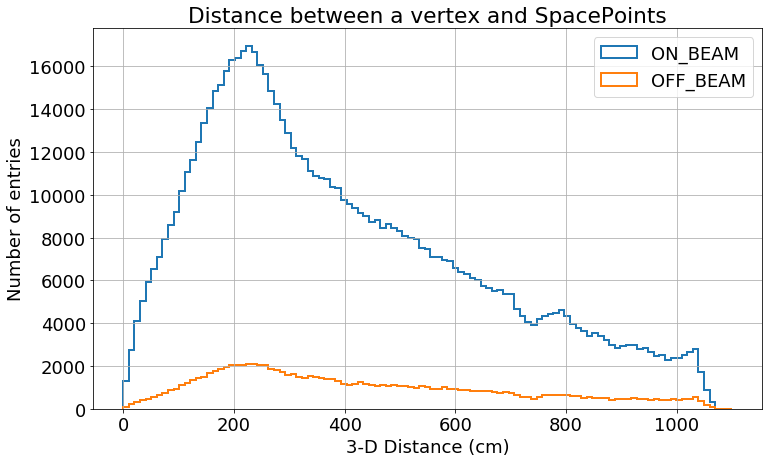

In [9]:
BINS = np.linspace(0,1100,110)
fig = plt.figure(figsize=(12,7))

plt.hist(df_Sps_ON_BEAM['distance'].values,bins=BINS,histtype='step',lw=2,label='ON_BEAM')
plt.hist(df_Sps_OFF_BEAM['distance'].values,bins=BINS,histtype='step',lw=2,label='OFF_BEAM')
plt.legend(loc=1)

plt.grid()
plt.title("Distance between a vertex and SpacePoints")
plt.xlabel('3-D Distance (cm)')
plt.ylabel('Number of entries')
plt.show()

In [10]:
df_Matching_ON_BEAM=Matching_tree_ON_BEAM.pandas.df().query(CLEAN_REGION)
df_Matching_OFF_BEAM=Matching_tree_OFF_BEAM.pandas.df().query(CLEAN_REGION)
df_Cluster_tree_ON_BEAM=Cluster_tree_ON_BEAM.pandas.df()
df_Cluster_tree_OFF_BEAM=Cluster_tree_OFF_BEAM.pandas.df()

In [11]:
df_Matching_ON_BEAM_match=df_Matching_ON_BEAM.query(MATCH_CUT)
df_Matching_OFF_BEAM_match=df_Matching_OFF_BEAM.query(MATCH_CUT)

In [12]:
df_Matching_ON_BEAM.head()

,V_biggest_iou,V_match_multiplicity,U_biggest_iou,U_match_multiplicity,Y_clus_lifetime,Y_clus_hitSize,V_clus_hitSize,U_clus_hitSize,Y_cluster_3d_hit_z,Y_cluster_3d_hit_x,...,YU_iou,deltaY,deltaY_smallest,Y_Wire,start_tick_cluster0,start_tick_cluster1,start_tick_cluster2,end_tick_cluster0,end_tick_cluster1,end_tick_cluster2
entry,,,,,,,,,,,,,,,,,,,,,
28,0.929888,5,0.642485,1,6.452393,2.0,1.0,1.0,422.999999,51.412901,...,0.642485,37.239092,0.173205,1409,0.0,0.0,0.0,0.0,0.0,0.0
29,0.622916,3,0.872356,2,6.877930,2.0,1.0,1.0,437.999999,203.023971,...,0.619428,-0.519615,0.519615,1461,0.0,0.0,0.0,0.0,0.0,0.0
30,0.731192,2,0.644693,1,7.191040,2.0,1.0,1.0,441.299999,18.568538,...,0.644693,-0.173205,0.173205,1472,0.0,0.0,0.0,0.0,0.0,0.0
31,-1.000000,0,0.952336,1,6.000000,1.0,1.0,1.0,446.399999,147.003405,...,0.952336,-9999.000000,0.173205,1488,0.0,0.0,0.0,0.0,0.0,0.0
32,0.775935,2,0.768744,1,6.000000,1.0,1.0,1.0,446.399999,193.949058,...,0.768744,-0.173205,0.173205,1488,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_Cluster_tree_ON_BEAM.head()

,cluster_hit_z,cluster_hit_x,Z_reco_best,X_reco_best,distance_smallest,plane
entry,,,,,,
0,0.0,143.959988,34.537792,199.242233,68.300236,0
1,0.0,168.298734,34.537792,199.242233,50.658619,0
2,0.0,172.842905,34.618454,201.035049,47.969717,0
3,0.0,230.414819,40.238239,225.096542,20.800245,0
4,33.0,199.053814,34.761585,202.370880,5.601030,0


In [14]:
df_Cluster_tree_OFF_BEAM.head()

,cluster_hit_z,cluster_hit_x,Z_reco_best,X_reco_best,distance_smallest,plane
entry,,,,,,
0,12.3,95.536807,43.845921,123.778557,30.082633,0
1,17.1,98.345185,43.845921,123.778557,26.120686,0
2,23.1,123.078808,44.008785,123.737595,0.664051,0
3,24.9,228.544050,42.416866,228.783722,0.550231,0
4,57.3,150.313973,106.301476,150.975479,0.670265,0


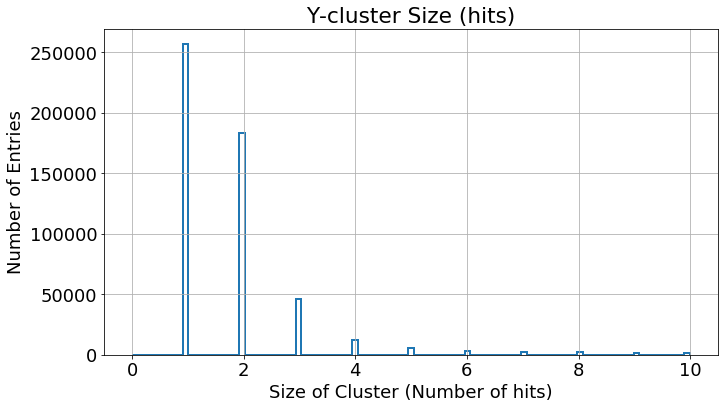

In [17]:
fig = plt.figure(figsize=(11,6))
BINS = np.linspace(0.0,10,100)

plt.hist(df_Matching_ON_BEAM['Y_clus_hitSize'].values,bins=BINS,histtype='step',lw=2,label='New Threshold')# (1 hit Clusters included) ',normed=True)

plt.title("Y-cluster Size (hits)")
plt.xlabel('Size of Cluster (Number of hits)')
plt.ylabel('Number of Entries')
plt.grid()

plt.show()
fig.savefig('Y_clus_hit_size.png', dpi=300)

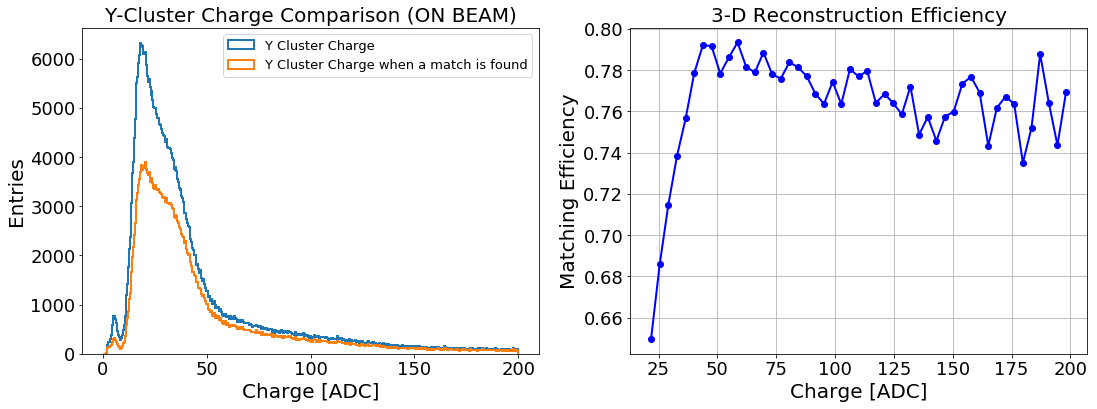

In [15]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_ON_BEAM['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_ON_BEAM_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (ON BEAM)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_ON_BEAM, bins2D_ON_BEAM = np.histogram(df_Matching_ON_BEAM['Y_cluster_charge'].values,bins=BINS)
vals3D_ON_BEAM, bins3D_ON_BEAM = np.histogram(df_Matching_ON_BEAM_match['Y_cluster_charge'].values,bins=BINS)
binC_ON_BEAM = 0.5*(bins2D_ON_BEAM[1:]+bins2D_ON_BEAM[:-1])
vals2D_ON_BEAM = vals2D_ON_BEAM.astype(float)
#print vals2D
vals3D_ON_BEAM = vals3D_ON_BEAM.astype(float)
ratio_v_ON_BEAM = []
for i,v in enumerate(vals2D_ON_BEAM):
    if (v == 0):
        ratio_v_ON_BEAM.append(0.)
    else:
        ratio_v_ON_BEAM.append(vals3D_ON_BEAM[i]/v)
#print ratio_v
plt.plot(binC_ON_BEAM,ratio_v_ON_BEAM,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency',fontsize=20)

plt.show()



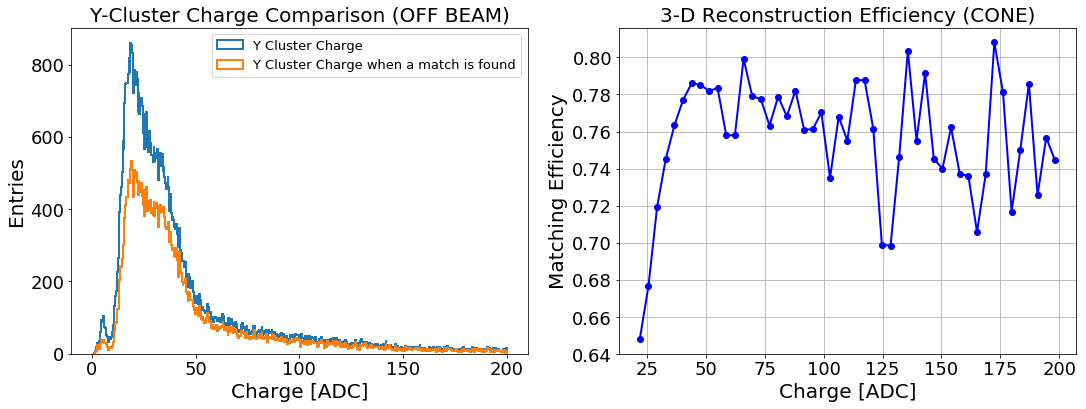

In [16]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_OFF_BEAM['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_OFF_BEAM_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (OFF BEAM)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_OFF_BEAM, bins2D_OFF_BEAM = np.histogram(df_Matching_OFF_BEAM['Y_cluster_charge'].values,bins=BINS)
vals3D_OFF_BEAM, bins3D_OFF_BEAM = np.histogram(df_Matching_OFF_BEAM_match['Y_cluster_charge'].values,bins=BINS)
binC_OFF_BEAM = 0.5*(bins2D_OFF_BEAM[1:]+bins2D_OFF_BEAM[:-1])
vals2D_OFF_BEAM = vals2D_OFF_BEAM.astype(float)
#print vals2D
vals3D_OFF_BEAM = vals3D_OFF_BEAM.astype(float)
ratio_v_OFF_BEAM = []
for i,v in enumerate(vals2D_OFF_BEAM):
    if (v == 0):
        ratio_v_OFF_BEAM.append(0.)
    else:
        ratio_v_OFF_BEAM.append(vals3D_OFF_BEAM[i]/v)
#print ratio_v
plt.plot(binC_OFF_BEAM,ratio_v_OFF_BEAM,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (CONE)',fontsize=20)

plt.show()



In [17]:
# Argon properties

#LAr temperature
T = 89
# density
rho = 1.38 # g/cm^3

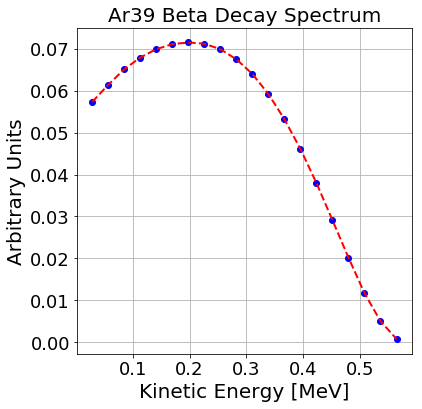

In [18]:
# Ar 39 energy spectrum

Ar39_E_v = [0.0282,0.0565,0.0847,0.1130,0.1412,0.1695,0.1977,0.2260,\
            0.2542,0.2825,0.3107,0.3390,0.3672,0.3955,0.4237,0.4520,0.4802,0.5085,0.5367,0.5650]

Ar39_A_v = [5.73E-02,6.14E-02,6.51E-02,6.79E-02,6.99E-02,7.11E-02,7.15E-02,\
            7.12E-02,6.99E-02,6.75E-02,6.40E-02,5.92E-02,5.32E-02,4.61E-02,\
            3.80E-02,2.91E-02,2.02E-02,1.17E-02,5.02E-03,7.77E-04]

# spline
Ar39spectrum = interp1d(Ar39_E_v,Ar39_A_v)

fig = plt.figure(figsize=(6,6))
plt.plot(Ar39_E_v,Ar39_A_v,'bo',lw=2)
xvals = np.linspace(Ar39_E_v[0],Ar39_E_v[-1],100)
plt.plot(xvals,Ar39spectrum(xvals),'r--',lw=2)
plt.xlabel("Kinetic Energy [MeV]",fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Beta Decay Spectrum',fontsize=20)
plt.grid()
plt.show()

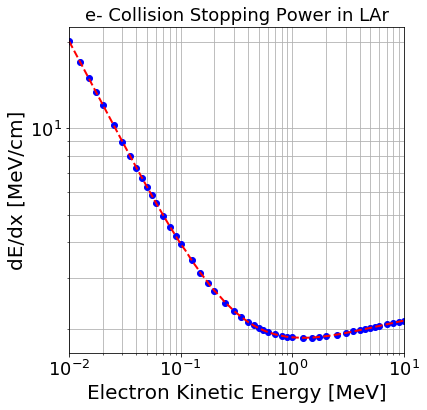

In [19]:
# load electron energy loss info [NIST]
fin = open('/uboone/app/users/abhat/gammacatcher_v08_00_00_09/srcs/ubreco/ubreco/GammaCatcher/nist_esar_ar_1p38density_188eV.txt','r')
ctr = 0

energy_v = []
collision_v = []

for line in fin:
    ctr += 1
    
    if (ctr < 9):
        continue
    words = line.split()
    if (len(words) != 4):
        continue
    energy_v.append   ( float(words[0])       )
    collision_v.append( float(words[1]) * rho )
    
energy_v    = np.array(energy_v   )
collision_v = np.array(collision_v)

dEdx = interp1d(energy_v,collision_v)

fig = plt.figure(figsize=(6,6))
plt.plot(energy_v,collision_v,'bo',lw=2)
xvals = np.linspace(0.01,10,1000)
plt.plot(xvals,dEdx(xvals),'r--',lw=2)
plt.xlim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('dE/dx [MeV/cm]',fontsize=20)
plt.title('e- Collision Stopping Power in LAr',fontsize=18)
plt.show()

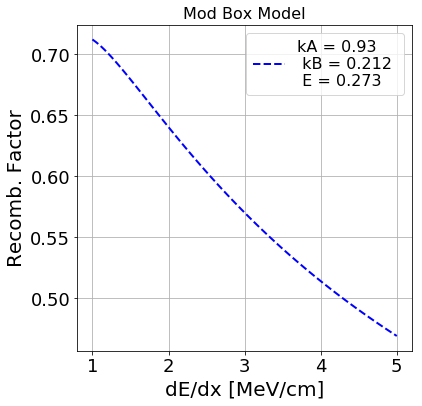

In [20]:
# Ion recombination model

# recombination model
def RecombModBox(dEdx, A, B, Efield):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A, k, Efield):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1/r


fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

fEfield  = 0.273

fig = plt.figure(figsize=(6,6))
dedx_v = np.linspace(1,5,100)
R_v = []
for dedx in dedx_v:
    R_v.append(1-RecombModBox(dedx,fModBoxA,fModBoxB,fEfield))
plt.plot(dedx_v,R_v,'b--',lw=2,label='kA = 0.93 \n kB = 0.212 \n E = 0.273')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontsize=20)
plt.ylabel('Recomb. Factor',fontsize=20)
plt.title('Mod Box Model',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.show()

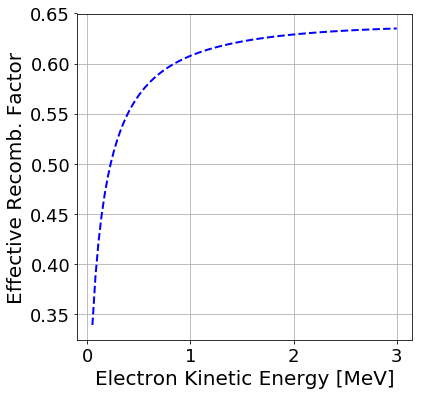

In [21]:
# Apply recombination model to get effective recombination for each electron energy
# return effective charge quenching amount
# effective recombination = amount of recombination for total energy lost by electron of given KE.

def EffectiveRecomb(ElectronEnergy,Estep,Field):
    
    # keep track of total energy lost
    dEtot = 0.
    # and total energy "seen" after recomb.
    dEobs = 0.
    
    while (ElectronEnergy > 1e-2):
    
        dedx = dEdx(ElectronEnergy)
        R    = RecombModBox(dedx,fModBoxA,fModBoxB,Field)
        
        dEtot += Estep
        dEobs += Estep * (1-R)
        
        ElectronEnergy -= Estep
        
        #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
        
    # perform last step
    dedx = dEdx(1e-2)
    dEtot += ElectronEnergy
    dEobs += ElectronEnergy * (1 - RecombModBox(dedx,fModBoxA,fModBoxB,Field))
    #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
    
    return dEobs/dEtot

def Charge(ElectronEnergy,efield):
    
    EffRecomb = EffectiveRecomb(ElectronEnergy,0.01,efield)
    Eobs = ElectronEnergy * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    return Qobs

EffectiveRecomb_v = np.vectorize(EffectiveRecomb)
Charge_v = np.vectorize(Charge)

EffectiveRecomb(0.25,0.01,0.273)

fig = plt.figure(figsize=(6,6))
Evals = np.linspace(0.05,3,100)
Rvals = []
for E in Evals:
    Rvals.append(EffectiveRecomb(E,0.01,0.273))
plt.plot(Evals,Rvals,'b--',lw=2)
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('Effective Recomb. Factor',fontsize=20)
plt.grid()
plt.show()



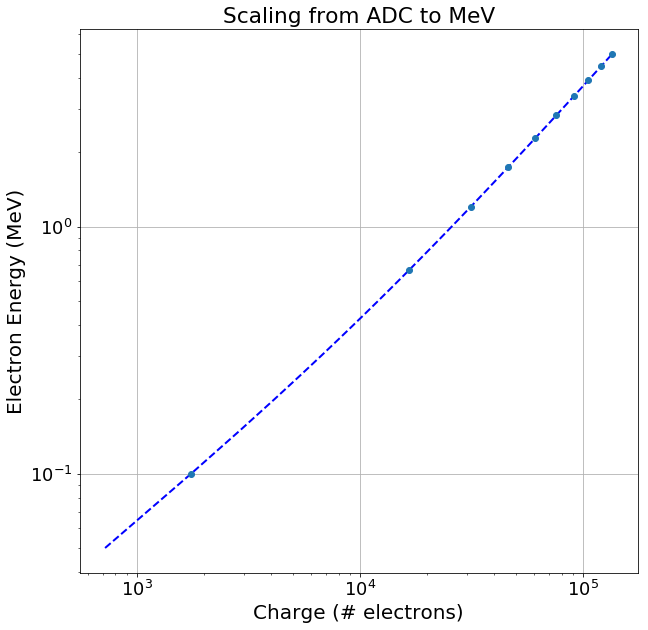

In [22]:
fig = plt.figure(figsize=(10,10))
Evals = np.linspace(0.05,5,100)
Qvals = []
for E in Evals:
    #R = EffectiveRecomb(E,0.01,0.273)
    Q = Charge(E,0.273)
    Qvals.append(Q)
    
fQ2E = interp1d(Qvals, Evals,kind='cubic')
xnew = np.linspace(Qvals[1], Qvals[-1], num=10, endpoint=True)
plt.plot(Qvals,Evals,'b--',xnew, fQ2E(xnew),'o',lw=2)
plt.ylabel('Electron Energy (MeV)',fontsize=20)
plt.xlabel('Charge (# electrons)',fontsize=20)
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.title('Scaling from ADC to MeV')
plt.show()
fig.savefig('Q2E.png', dpi=300)

In [23]:
# calculate Ar39 spectrum [in drifted electrons] accounting for recombination

# sample randomly from Ar39 spectrum and calculate visible charge for each event
Ar39_Q_v = []

Eavg = 0.

for n in xrange(5000):
    
    found = False
    while (found == False):
        Eval = np.random.uniform(Ar39_E_v[0],Ar39_E_v[-1])
        if (Ar39spectrum(Eval) > np.random.uniform(0,0.08) ): # 0.08 due to values in 1st histogram in notebook
            found = True
    Eavg += Eval
    EffRecomb = EffectiveRecomb(Eval,0.01,0.273)
    Eobs = Eval * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    Ar39_Q_v.append(Qobs)
Eavg /= 5000
print Eavg

0.236836612263


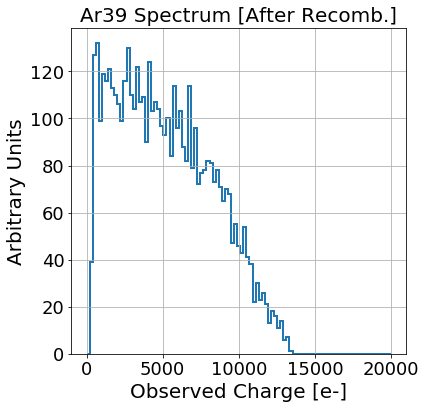

In [24]:
fig = plt.figure(figsize=(6,6))
plt.hist(Ar39_Q_v,bins=np.linspace(0,2e4,100),histtype='step',lw=2)
plt.grid()
plt.xlabel('Observed Charge [e-]',fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Spectrum [After Recomb.]',fontsize=20)
plt.show()

In [25]:
elec_KE = np.linspace(0.05,1,100)
elec_Q_273 = []
elec_Q_500 = []
for ke in elec_KE:
    elec_Q_273.append(Charge(ke,0.273)/1e3)
    elec_Q_500.append(Charge(ke,0.500)/1e3)

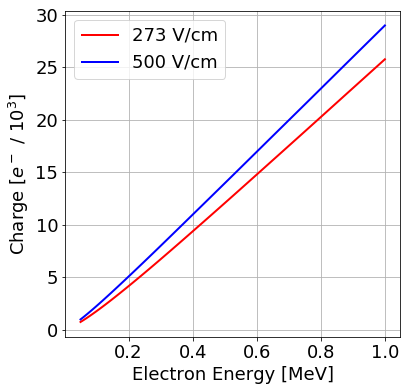

In [26]:
fig = plt.figure(figsize=(6,6))
plt.plot(elec_KE,elec_Q_273,lw=2,color='r',label='273 V/cm')
plt.plot(elec_KE,elec_Q_500,lw=2,color='b',label='500 V/cm')
plt.grid()
plt.xlabel('Electron Energy [MeV]')
plt.ylabel('Charge [$e^-$ / $10^3$]')
plt.legend(loc=2,fontsize=18)
plt.show()

In [27]:
def E_recoY_ON_BEAM(df,gain):
    YQ_ON_BEAM = df['Y_cluster_charge']
    QrecoY_ON_BEAM = YQ_ON_BEAM * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_ON_BEAM = fQ2E(QrecoY_ON_BEAM)
    return ErecoY_ON_BEAM


def E_recoU_ON_BEAM(df,gain):
    UQ_ON_BEAM = df['U_cluster_charge']
    QrecoU_ON_BEAM = UQ_ON_BEAM * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_ON_BEAM = fQ2E(QrecoU_ON_BEAM)
    return ErecoU_ON_BEAM



def E_recoV_ON_BEAM(df,gain):
    VQ_ON_BEAM = df['V_cluster_charge']
    QrecoV_ON_BEAM = VQ_ON_BEAM * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_ON_BEAM = fQ2E(QrecoV_ON_BEAM)
    return ErecoV_ON_BEAM




def E_recoY_OFF_BEAM(df,gain):
    YQ_OFF_BEAM = df['Y_cluster_charge']
    QrecoY_OFF_BEAM = YQ_OFF_BEAM * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_OFF_BEAM = fQ2E(QrecoY_OFF_BEAM)
    return ErecoY_OFF_BEAM


def E_recoU_OFF_BEAM(df,gain):
    UQ_OFF_BEAM = df['U_cluster_charge']
    QrecoU_OFF_BEAM = UQ_OFF_BEAM * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_OFF_BEAM = fQ2E(QrecoU_OFF_BEAM)
    return ErecoU_OFF_BEAM



def E_recoV_OFF_BEAM(df,gain):
    VQ_OFF_BEAM = df['V_cluster_charge']
    QrecoV_OFF_BEAM = VQ_OFF_BEAM * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_OFF_BEAM = fQ2E(QrecoV_OFF_BEAM)
    return ErecoV_OFF_BEAM

In [28]:
dfcut_match_ON_BEAM = df_Matching_ON_BEAM_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_ON_BEAM   = df_Matching_ON_BEAM.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_ON_BEAM['energy'] = E_recoY_ON_BEAM(dfcut_match_ON_BEAM,238.4)
dfcut_all_ON_BEAM['energy']   = E_recoY_ON_BEAM(dfcut_all_ON_BEAM,238.4)



dfcut_match_OFF_BEAM = df_Matching_OFF_BEAM_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_OFF_BEAM   = df_Matching_OFF_BEAM.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_OFF_BEAM['energy'] = E_recoY_OFF_BEAM(dfcut_match_OFF_BEAM,238.4)
dfcut_all_OFF_BEAM['energy']   = E_recoY_OFF_BEAM(dfcut_all_OFF_BEAM,238.4)



/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

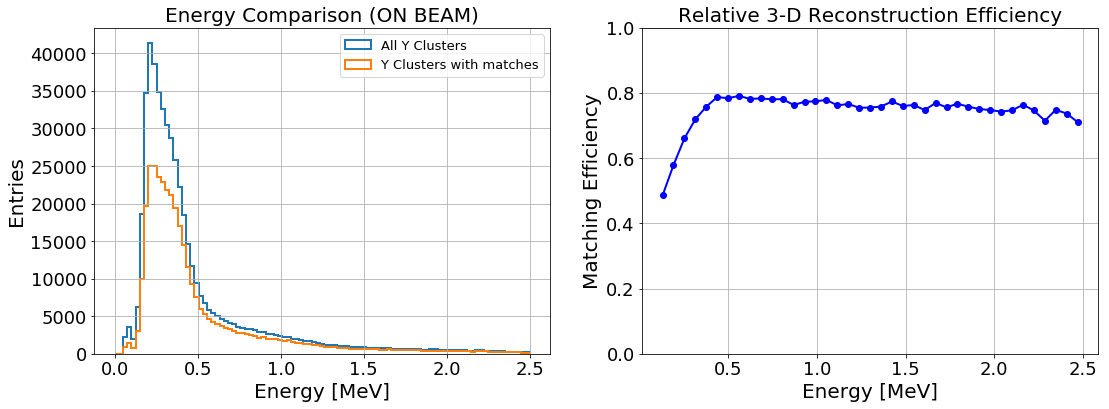

In [29]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2.5,100)
plt.hist(dfcut_all_ON_BEAM['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_ON_BEAM['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (ON BEAM)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2.5,40)

vals2D_ON_BEAM, bins2D_ON_BEAM = np.histogram(dfcut_all_ON_BEAM['energy'].values,bins=BINS)
vals3D_ON_BEAM, bins3D_ON_BEAM = np.histogram(dfcut_match_ON_BEAM['energy'].values,bins=BINS)
binC_ON_BEAM = 0.5*(bins2D_ON_BEAM[1:]+bins2D_ON_BEAM[:-1])
vals2D_ON_BEAM = vals2D_ON_BEAM.astype(float)
#print vals2D
vals3D_ON_BEAM = vals3D_ON_BEAM.astype(float)
ratio_v_ON_BEAM = []
for i,v in enumerate(vals2D_ON_BEAM):
    if (v == 0):
        ratio_v_ON_BEAM.append(0.)
    else:
        ratio_v_ON_BEAM.append(vals3D_ON_BEAM[i]/v)
#print ratio_v
plt.plot(binC_ON_BEAM,ratio_v_ON_BEAM,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('Relative 3-D Reconstruction Efficiency',fontsize=20)
plt.ylim((0,1))

plt.grid()
plt.show()
fig.savefig('Plot_plot.png', dpi=300)
#print dfcut_match_ON_BEAM.shape[0]

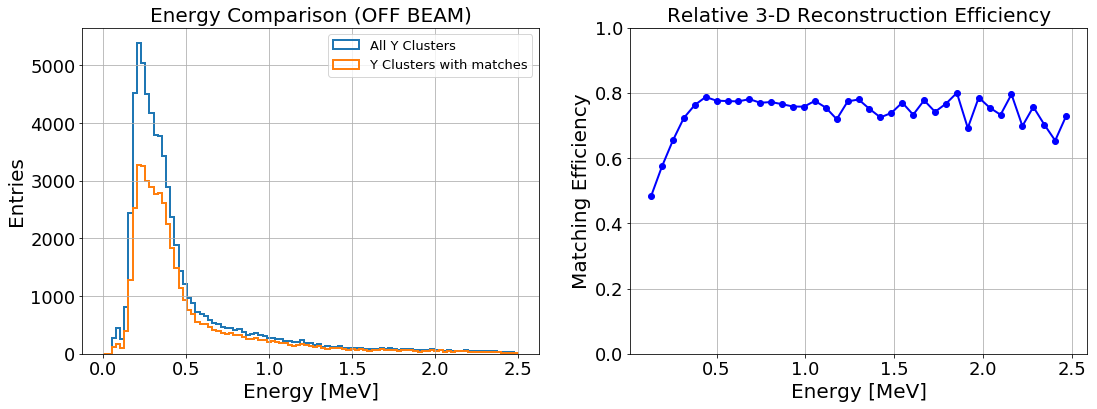

In [30]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2.5,100)
plt.hist(dfcut_all_OFF_BEAM['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_OFF_BEAM['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (OFF BEAM)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2.5,40)

vals2D_OFF_BEAM, bins2D_OFF_BEAM = np.histogram(dfcut_all_OFF_BEAM['energy'].values,bins=BINS)
vals3D_OFF_BEAM, bins3D_OFF_BEAM = np.histogram(dfcut_match_OFF_BEAM['energy'].values,bins=BINS)
binC_OFF_BEAM = 0.5*(bins2D_OFF_BEAM[1:]+bins2D_OFF_BEAM[:-1])
vals2D_OFF_BEAM = vals2D_OFF_BEAM.astype(float)
#print vals2D
vals3D_OFF_BEAM = vals3D_OFF_BEAM.astype(float)
ratio_v_OFF_BEAM = []
for i,v in enumerate(vals2D_OFF_BEAM):
    if (v == 0):
        ratio_v_OFF_BEAM.append(0.)
    else:
        ratio_v_OFF_BEAM.append(vals3D_OFF_BEAM[i]/v)
#print ratio_v
plt.plot(binC_OFF_BEAM,ratio_v_OFF_BEAM,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.ylim((0,1))
plt.title('Relative 3-D Reconstruction Efficiency',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)
#print dfcut_match_OFF_BEAM.shape[0]

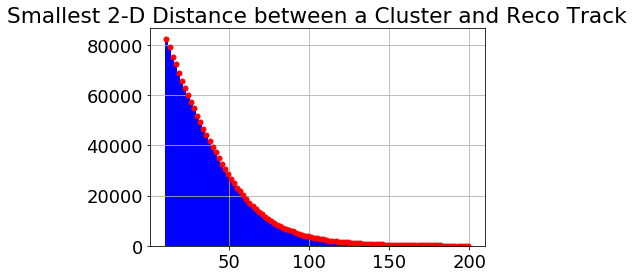

In [41]:
plt.grid(True) #ALWAYS TRUE
mybins = np.linspace(10,200,100)
plt.title("Smallest 2-D Distance between a Cluster and Reco Track")
binv, bine = np.histogram(df_Cluster_tree_OFF_BEAM['distance_smallest'].values,bins=mybins)
binc = 0.5*(bine[1:]+bine[:-1])
binv = binv.astype(float)
errors = np.sqrt(binv)
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)
poop = plt.hist(df_Cluster_tree_OFF_BEAM['distance_smallest'].values,bins=mybins,color='blue')
plt.show()

In [42]:
#def fun(x, a, b, c, d):
def fun(x, a, b, c):
    #return a*exp(-x/b)+c*exp(-x/d)
    #return a*exp(-x/b) +(c*x)+d
    return a*exp(-x/b)  + c
f2 = np.vectorize(fun)
fun(5.,2,2,2)

2.1641699972477975

In [43]:
guess = [binc[1],5.,250]

In [44]:
xvals = np.linspace(bine[0],bine[-1],100)

In [45]:
popt,popv = curve_fit(f2,binc,binv,p0=guess)

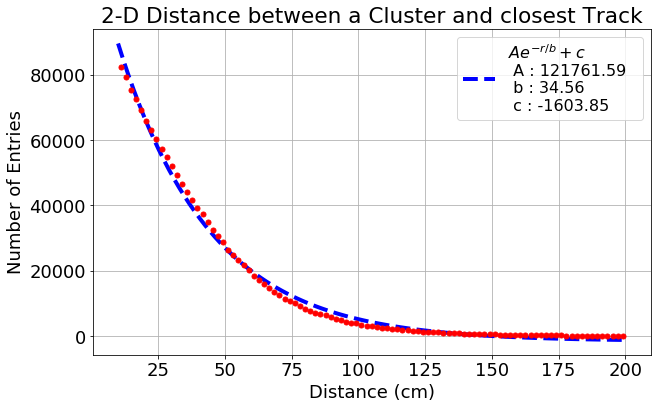

<Figure size 432x288 with 0 Axes>

In [46]:
fig = plt.figure(figsize=(10,6))
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)
plt.plot(xvals,f2(xvals,*popt),'b--',lw=4,\
         label='$Ae^{-r/b} + c$ \n A : %.02f  \n b : %.02f  \n c : %.02f '%(popt[0],popt[1],popt[2]))
#plt.plot([20, 100], [500, 500], 'k-', lw=3)#[x1,x2],[y1,y2]
plt.grid()
plt.title("2-D Distance between a Cluster and closest Track")
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Entries')
plt.legend(loc=1,fontsize=16)
#plt.yscale('log')
plt.show()
plt.draw()
fig.savefig('Fit_2d_lowthreshold.png', dpi=600)

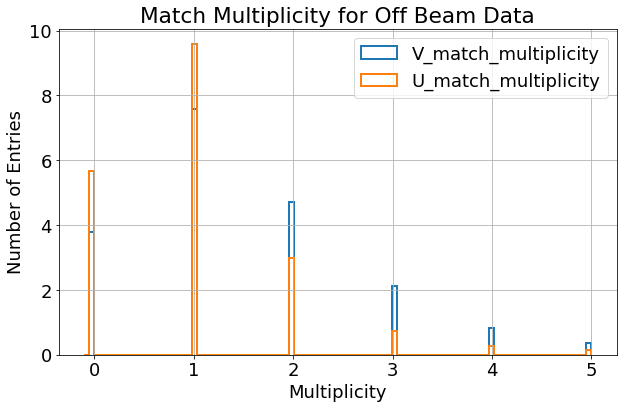

In [49]:

fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-0.1,5,100)

plt.hist(df_Matching_OFF_BEAM['V_match_multiplicity'].values,bins=BINS,histtype='step',lw=2,label='V_match_multiplicity',density=True)
plt.hist(df_Matching_OFF_BEAM['U_match_multiplicity'].values,bins=BINS,histtype='step',lw=2,label='U_match_multiplicity',density=True)
plt.title("Match Multiplicity for Off Beam Data")
plt.xlabel('Multiplicity')
plt.ylabel('Number of Entries')
plt.grid()
plt.legend(loc=1)
plt.show()


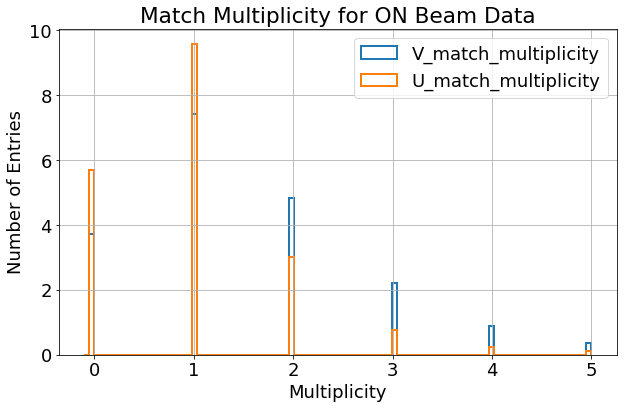

In [52]:

fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-0.1,5,100)

plt.hist(df_Matching_ON_BEAM['V_match_multiplicity'].values,bins=BINS,histtype='step',lw=2,label='V_match_multiplicity',density=True)
plt.hist(df_Matching_ON_BEAM['U_match_multiplicity'].values,bins=BINS,histtype='step',lw=2,label='U_match_multiplicity',density=True)
plt.title("Match Multiplicity for ON Beam Data")
plt.xlabel('Multiplicity')
plt.ylabel('Number of Entries')
plt.grid()
plt.legend(loc=1)
plt.show()


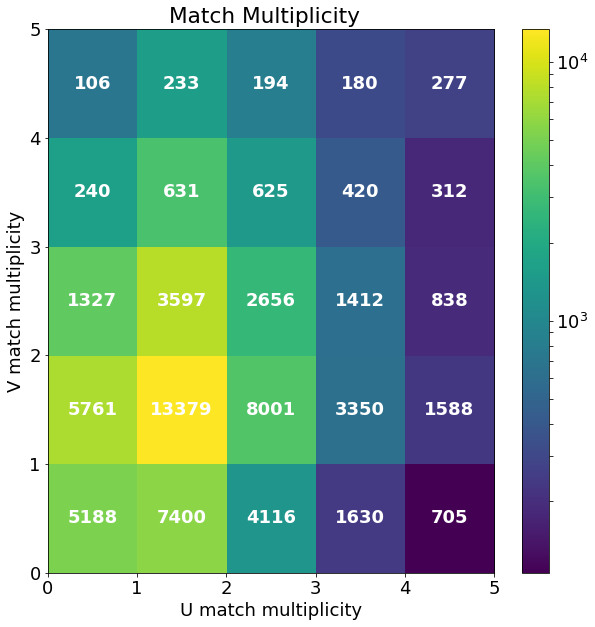

In [51]:

fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_OFF_BEAM['U_match_multiplicity'].values,df_Matching_OFF_BEAM['V_match_multiplicity'].values, bins=(5), range=[[-0.0000001, 5], [-0.00000010, 5]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold")

plt.colorbar()
plt.title('Match Multiplicity  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()



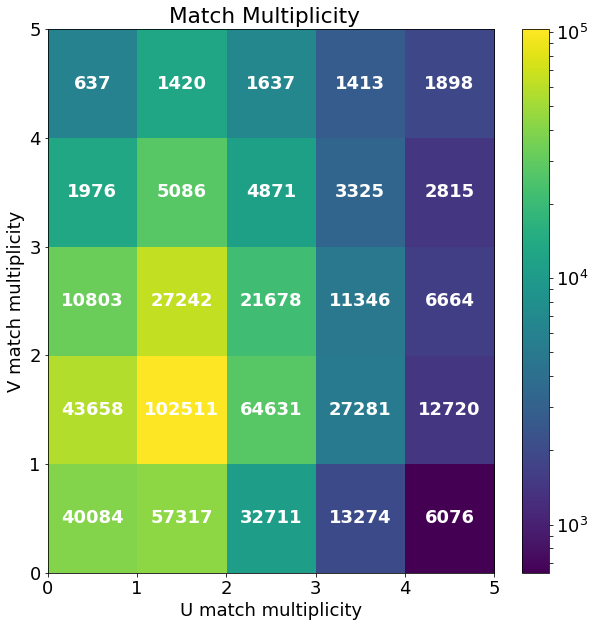

In [53]:

fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_ON_BEAM['U_match_multiplicity'].values,df_Matching_ON_BEAM['V_match_multiplicity'].values, bins=(5), range=[[-0.0000001, 5], [-0.00000010, 5]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold")

plt.colorbar()
plt.title('Match Multiplicity  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()



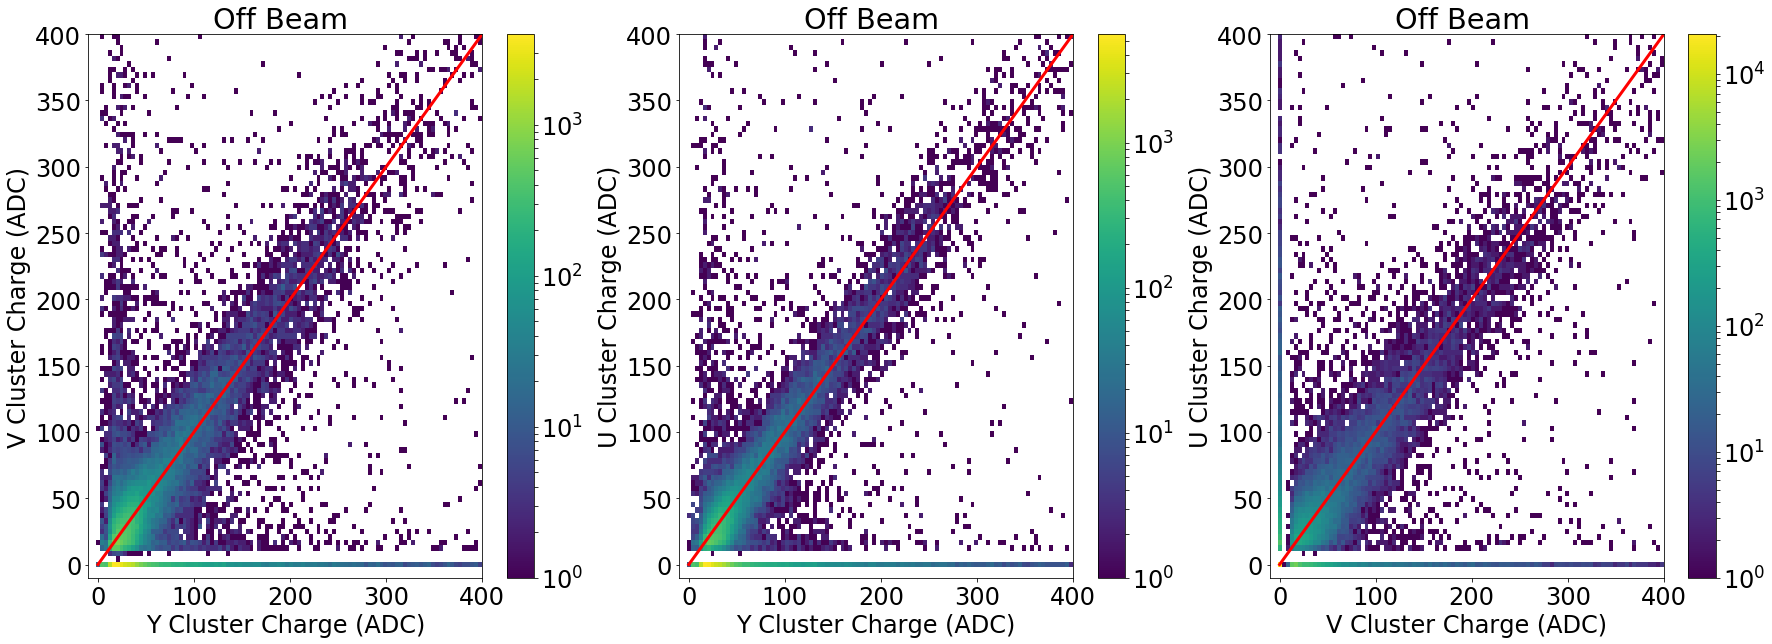

In [55]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_Matching_OFF_BEAM['Y_cluster_charge'].values,df_Matching_OFF_BEAM['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('Off Beam ')


plt.subplot(1, 3, 2)
plt.hist2d(df_Matching_OFF_BEAM['Y_cluster_charge'].values,df_Matching_OFF_BEAM['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('Off Beam ')



plt.subplot(1, 3, 3)
plt.hist2d(df_Matching_OFF_BEAM['V_cluster_charge'].values,df_Matching_OFF_BEAM['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('Off Beam ')

plt.show()



